In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [235]:
df=pd.read_csv('E:\\Machine Learning Project\\travel (2).csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [237]:
df.isna().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [238]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [239]:

# From the numeric column statistics, it can be inferred that:
# # 
# There are columns with null/empty values because the count is less than the total number of rows, namely Age, 
# DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, and MonthlyIncome.
# Outliers are present in the DurationOfPitch and NumberOfTrips columns due to their extremely high maximum values compared to the third quartile (Q3).
# The MonthlyIncome column has outliers, as indicated by a mean significantly higher than the median.
# For other columns, the distribution is likely to be close to normal, especially the Age column.

In [240]:
df.describe(include='object').T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


<!-- From the categorical column statistics, it can be concluded that:

There is a column with null/empty values because the count is less than the total number of rows, namely TypeofContact.
There are columns with proportions exceeding 50% of the total number of rows, specifically "Self Enquiry" in the TypeofContact column and "Male" in the Gender column. For a clearer understanding of the proportion of each category in these columns, refer to the details below. -->

In [241]:
# From the categorical column statistics, it can be concluded that:
# 
# There is a column with null/empty values because the count is less than the total number of rows, namely TypeofContact.
# There are columns with proportions exceeding 50% of the total number of rows, specifically "Self Enquiry" in the TypeofContact column and "Male" in the Gender column. For a clearer understanding of the proportion of each category in these columns, refer to the details below.

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Numerical cols >>  14 ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
Categorical cols >>  6 ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


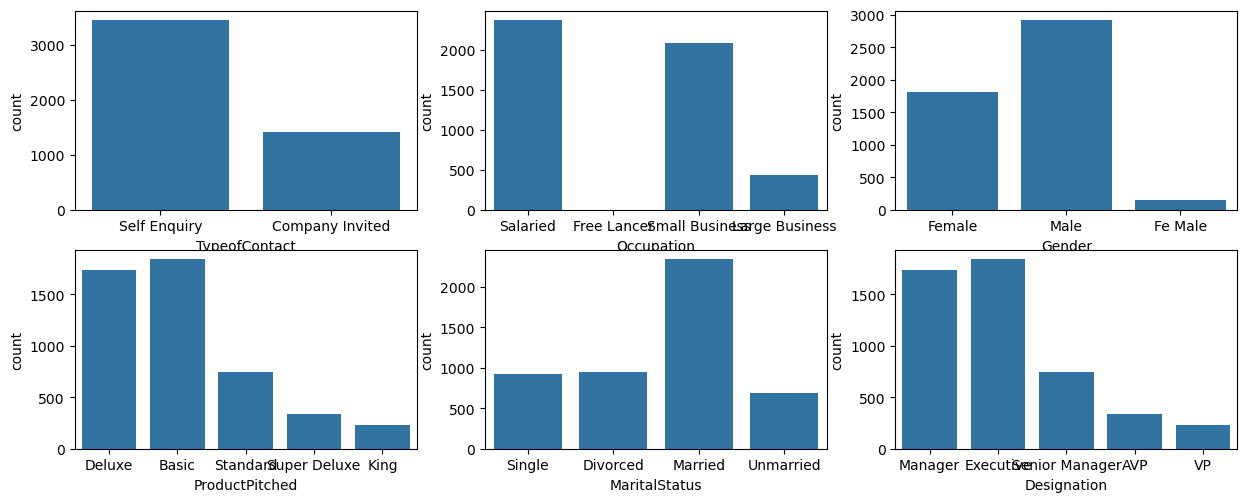

In [243]:
cat_col=df.select_dtypes(include='object').columns.tolist()
num_col=df.select_dtypes(exclude='object').columns.tolist()
print('Numerical cols >> ',len(num_col),num_col)
print('Categorical cols >> ',len(cat_col),cat_col)
plt.figure(figsize=(15,15))

for i in range(0,len(cat_col)):
    plt.subplot(5,3,i+1)
    sns.countplot(x=df[cat_col[i]])
    

In [244]:
# From the above visualizations, the following conclusions can be drawn:

# In the TypeofContact column, "Self Enquiry" dominates (with a data proportion of more than 50%).
# In the Occupation column, "Salaried" and "Small Business" dominate, while the number of "Free Lancer" entries is too small and may be considered for removal.
# In the Gender column, the male gender is more prevalent than the female gender. Additionally, there is a typographical error in the category "Fe Male," which should be corrected to "Female."
# The ProductPitched and Designation columns are dominated by two categories each.
# In the MaritalStatus column, "Married" is the dominant status. Additionally, "Single" and "Unmarried" statuses can be considered equivalent and merged.

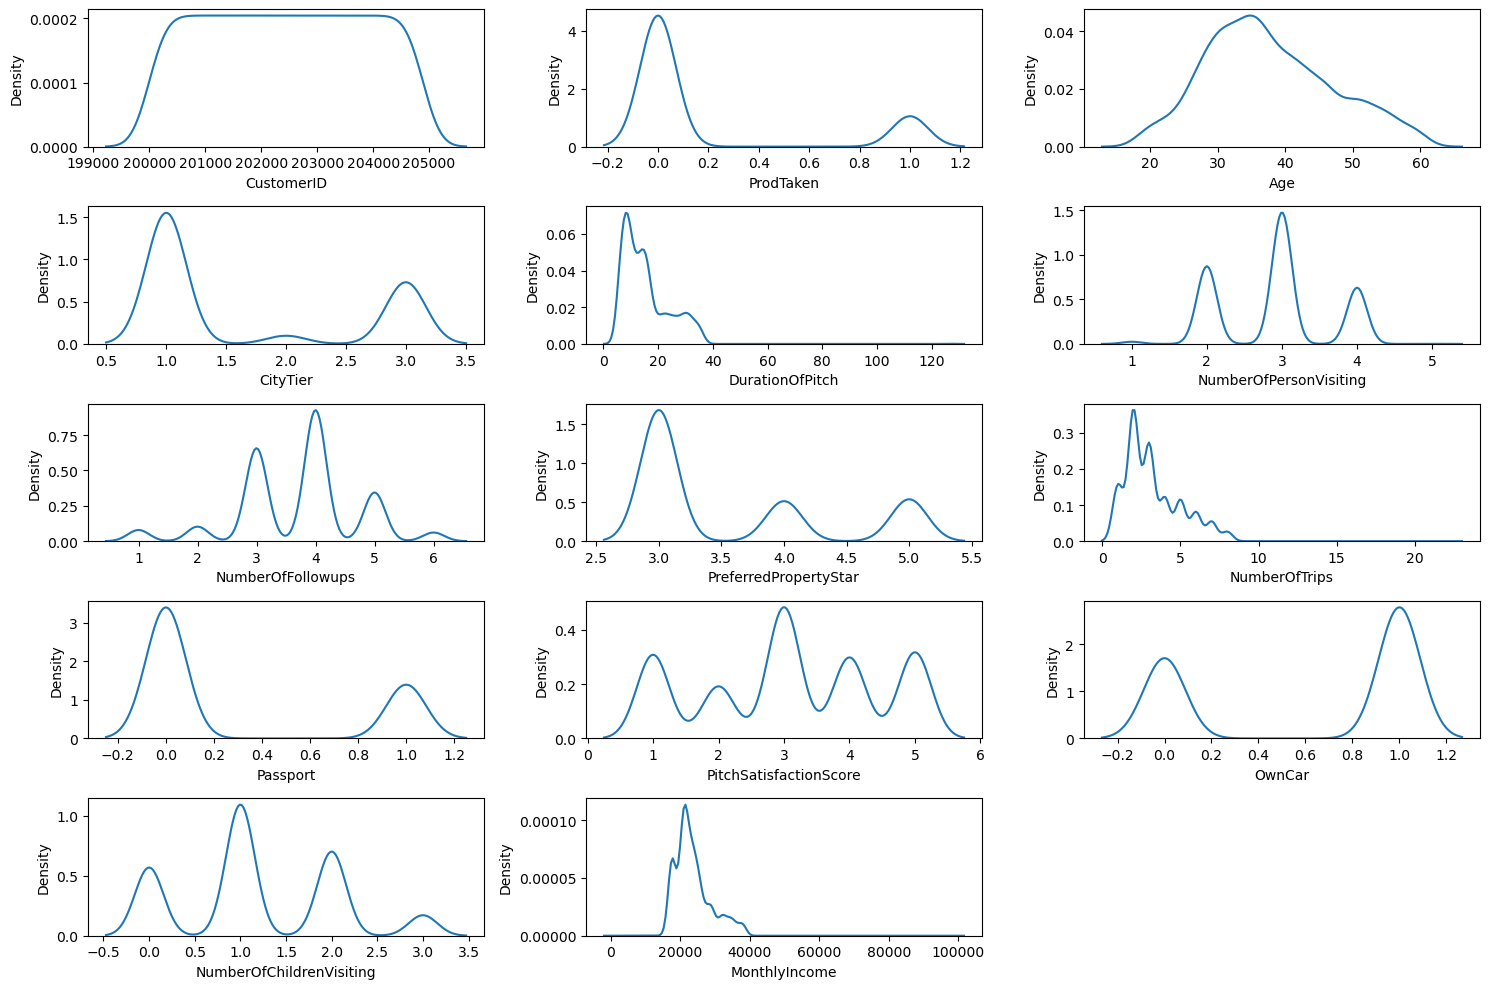

In [245]:
plt.figure(figsize=(15,10))
# clr1=['#E84855', '#1D8A99']
for i in range(0,len(num_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [246]:
# From the results of the visualizations, the following conclusions can be drawn:

# The CustomerID column has a widespread of data, possibly because each row corresponds to a unique customer. Therefore, this column might be considered for deletion later.
# The Age column appears to approximate a normal distribution.
# The DurationOfPitch, NumberOfTrips, and MonthlyIncome columns seem to exhibit a positively skewed (right-skewed) data distribution, indicating the presence of outliers.
# Other columns can be disregarded since they inherently belong to discrete or ordinal data types.

#### Multivariate Analysis

In [247]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


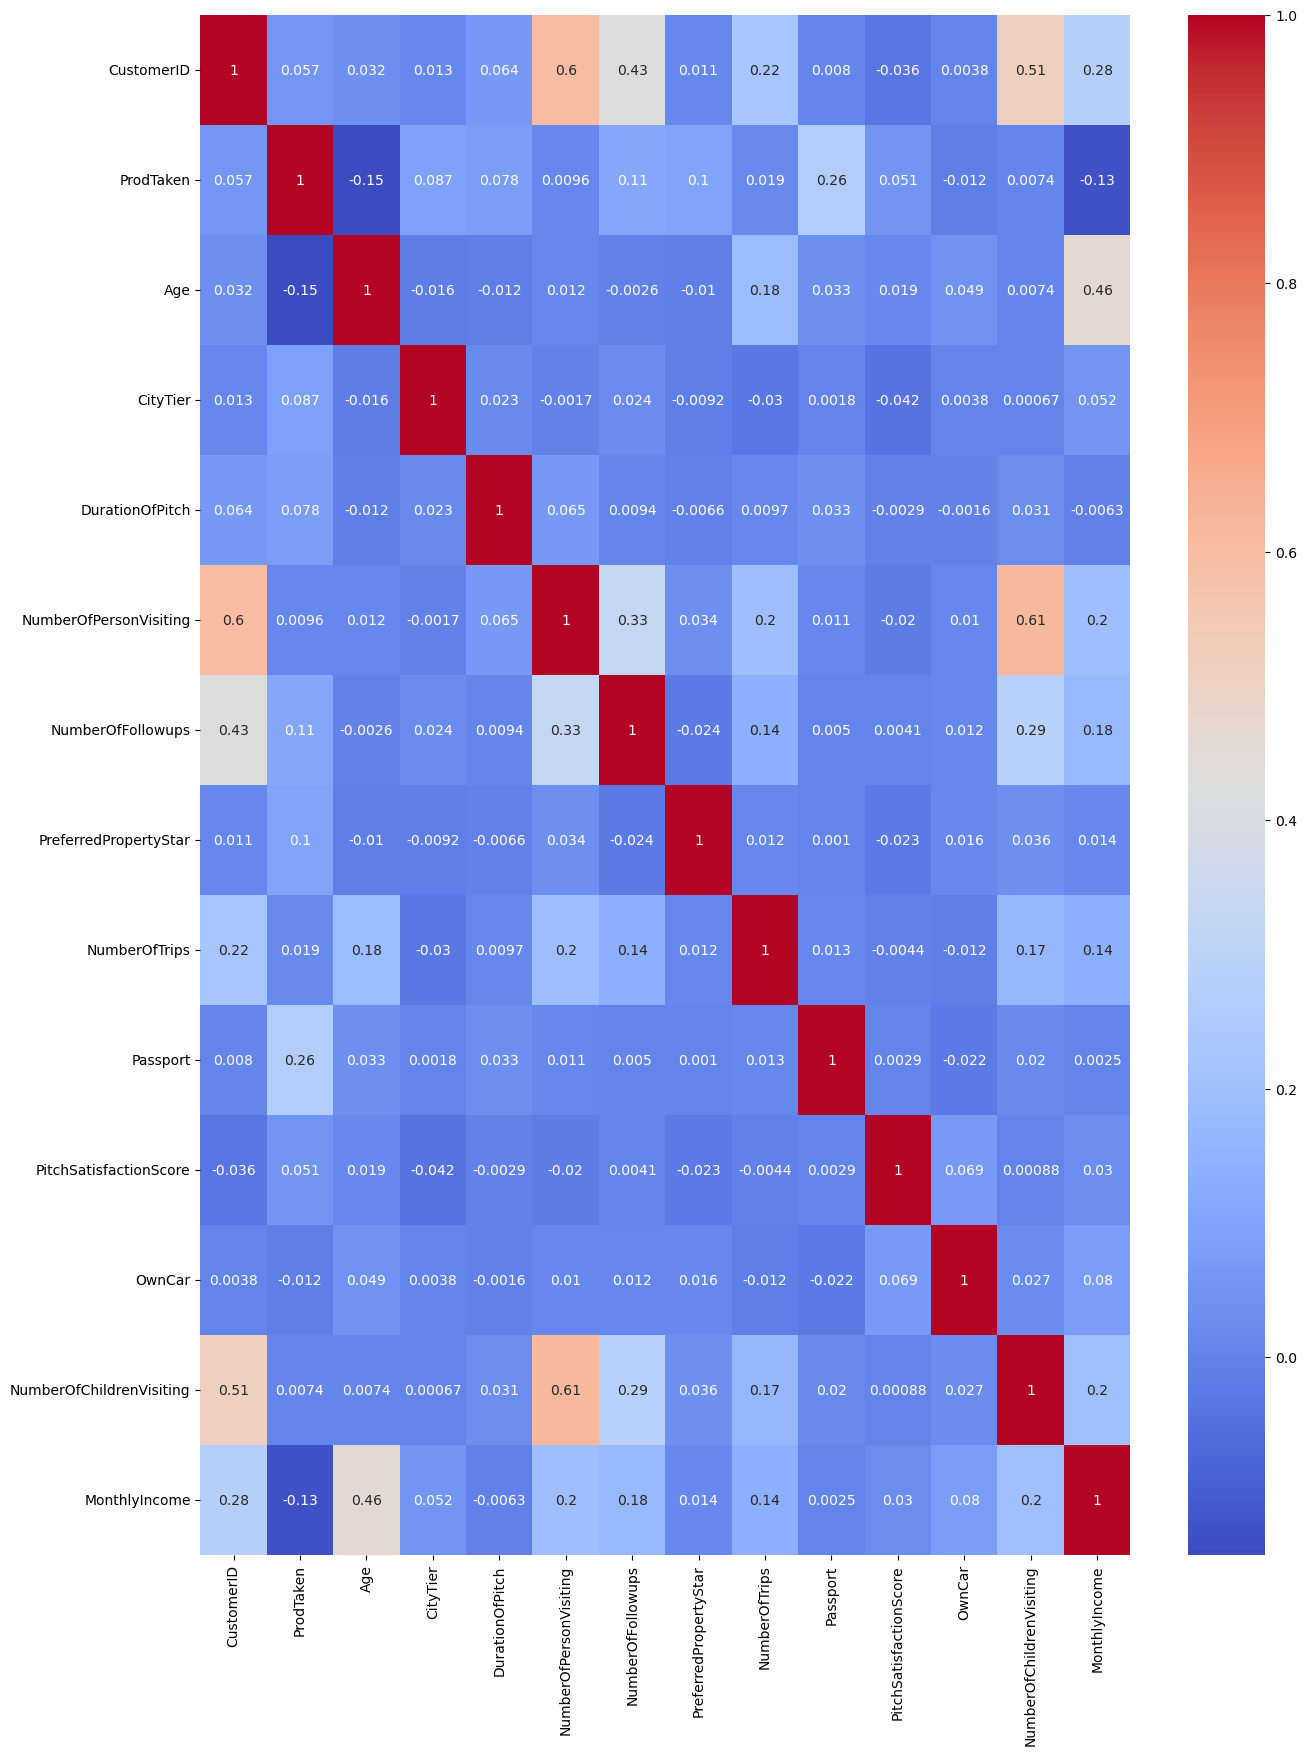

In [251]:
# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 20))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [252]:
# From the correlation results, it is observed that:

# The target column, ProdTaken, has a weak negative correlation with Age and MonthlyIncome.
# The NumberOfFollowups and Passport columns also have a weak positive correlation with ProdTaken.
# The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a quite strong positive correlation, suggesting that they could be combined into a new feature column.

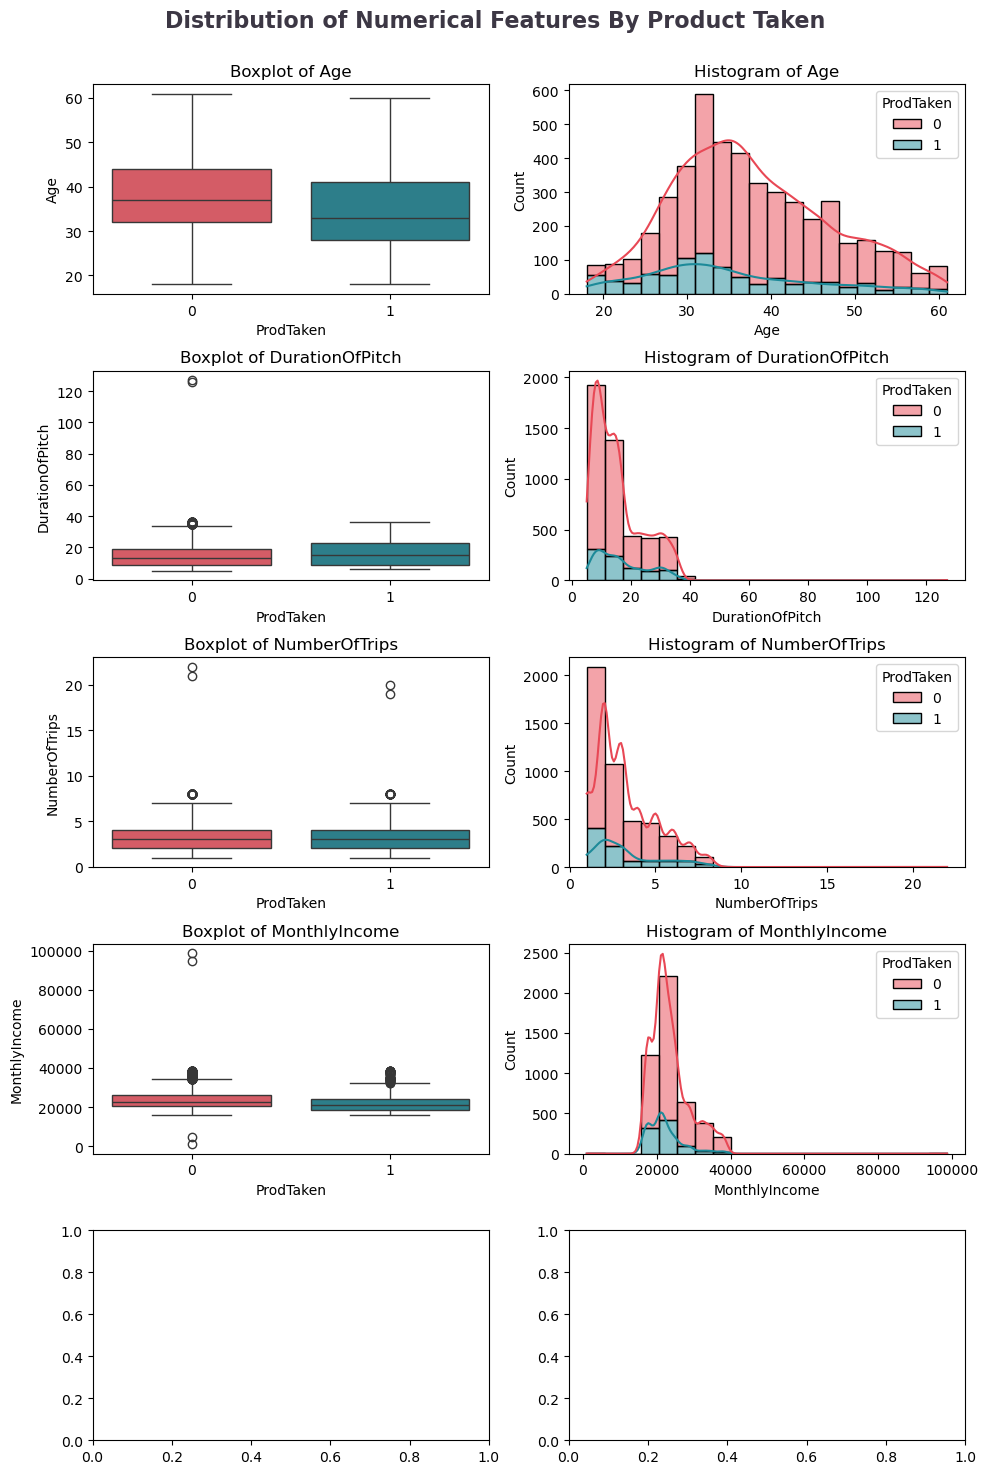

In [253]:
#EDA
num_cols2 = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
clr1 = ['#E84855', '#1D8A99']
fig, ax = plt.subplots(5, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(num_cols2):   
    sns.boxplot(data=df, x='ProdTaken', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ProdTaken', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)


In [254]:
# From the visualization results, the following conclusions can be drawn:

# In the CustomerID column, the data has unique values for each row, suggesting that it can be disregarded as a feature.
# Customers who purchase travel packages are mostly in the age range of 20-35.
# Sales pitches with a duration of less than 20 minutes increase the likelihood of customers purchasing a travel package.
# The majority of customers have taken less than 5 trips within a year.
# Customers with a monthly income ranging from 150,000 to 250,000 are more likely to be interested in purchasing travel packages.

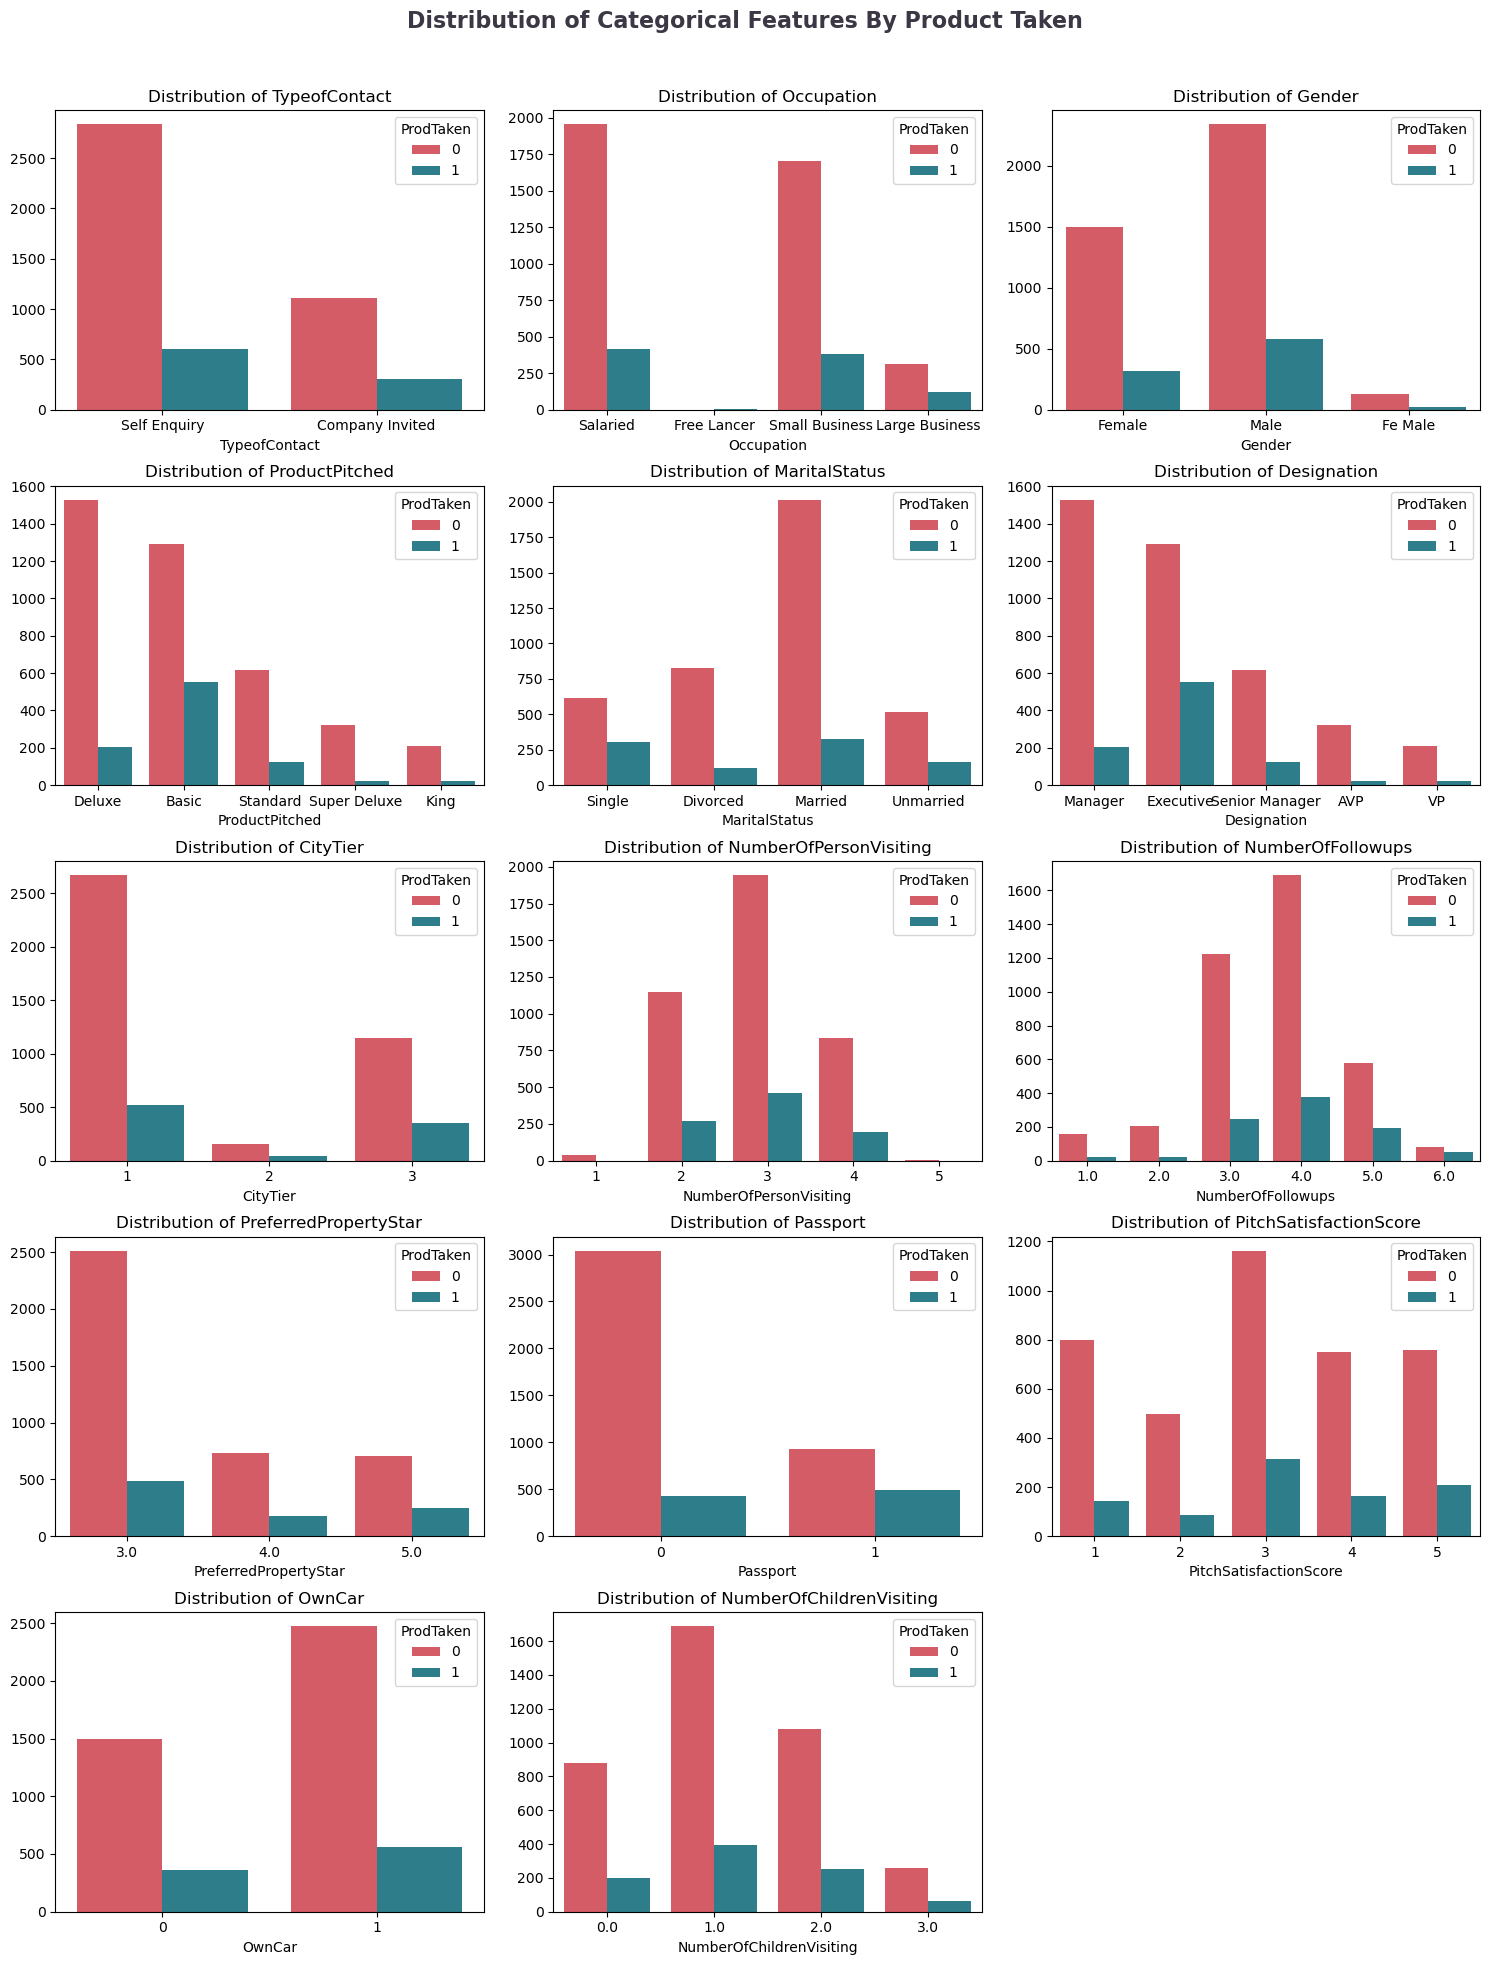

In [255]:
# EDA Categorical Features by Target
cat_cols2 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
clr2 = ['#E84855', '#1D8A99']
fig, axes = plt.subplots(5, 3, figsize=(15,20))
fig.suptitle('Distribution of Categorical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='ProdTaken', palette=clr2, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)

In [256]:
# From the above visualizations, the following conclusions can be drawn:

# Customers with the type of contact "Self Enquiry" are more likely to purchase travel packages compared to those who were "Company Invited."
# Customers with occupations labeled as "Salaried" and "Small Business" show a higher interest in
# purchasing travel packages, while "Free Lancer" customers, although fewer in number, tend to buy travel packages.
# Male customers are more likely to purchase travel packages than female customers.
# Customers who are both married and single or unmarried show a significant interest in buying travel packages.
# Travel packages offered to customers with an "Executive" designation are more frequently purchased.
# Customers in City Tier 1 and Tier 3 show a higher interest in purchasing travel packages.
# Groups of 2-4 people planning to travel show a higher likelihood of buying travel packages.
# Customers who have been followed up by sales representatives 3 times or more after pitching are more likely to purchase travel packages.
# Customers giving a rating of 3 to the hotel property they will use during their vacation are more likely to buy travel packages.
# Customers with a passport are slightly more likely to purchase travel packages.
# Customers giving a satisfaction score of 3 or higher are more likely to buy travel packages.
# Customers with a car are more likely to purchase travel packages.
# Customers with 0 or 1 child under 5 years old are more likely to buy travel packages.

In [257]:
#Correlation of categorical column with targer Chi2 test
##H0= cat column is not correlated with target
##H1= cat column is correlated with taget

from scipy.stats import chi2_contingency
chi_test=[]

for i in cat_col:
    p_value=chi2_contingency(pd.crosstab(df['ProdTaken'],df[i]))[1]
    if p_value<=0.05:
        chi_test.append('Reject null hypothesis')
    else:
        chi_test.append('Fail to reject null hypothesis')
        
result = pd.DataFrame(data=[cat_col, chi_test]).T
result.columns = ['Column', 'Hypothesis Result']
result


,Column,Hypothesis Result
0,TypeofContact,Reject null hypothesis
1,Occupation,Reject null hypothesis
2,Gender,Fail to reject null hypothesis
3,ProductPitched,Reject null hypothesis
4,MaritalStatus,Reject null hypothesis
5,Designation,Reject null hypothesis


In [258]:
# #Gender is not correlated target
# The "Gender" column may not be included as a feature because we fail to reject the null hypothesis (meaning the column is not correlated with the target).

# For the "TypeofContact," "Occupation," "ProductPitched," "MaritalStatus," and "Designation" columns, they can be included as features because we reject the null hypothesis (meaning these columns are correlated with the target).

In [259]:
#Handling inconsistent data
df['Gender']=np.where(df['Gender']=='Fe Male','Female',df['Gender'])
df['MaritalStatus']=df['MaritalStatus'].replace({'Unmarried':'Single'})

In [260]:
#check target imbalance data
df['ProdTaken'].value_counts(normalize=True)

ProdTaken
0    0.811784
1    0.188216
Name: proportion, dtype: float64

In [261]:
# Based on the EDA (Exploratory Data Analysis) results, the following conclusions can be drawn:

# Column names and data types are correct, but there is data error in the "Gender" column and data inconsistency in the "Marital Status" column.

# Missing values are present in the following columns: Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, and TypeofContact.

# Outliers are detected in the columns: DurationOfPitch, NumberOfTrips, and MonthlyIncome.

# The "CustomerID" column can be safely removed as each row has a unique customer ID.- done

# The "ProdTaken" column is the target variable that will be predicted in the analysis.

# Numeric columns with noticeable correlations to the target can be used as features, including Age, MonthlyIncome, NumberOfFollowups, and Passport.

# The "NumberOfPersonVisiting" and "NumberOfChildrenVisiting" columns have a strong positive correlation and can be combined into a new feature called "TotalVisiting."

# Some numeric columns that show no significant correlation with the target can be considered for removal.

# In the categorical columns, features such as TypeofContact, Occupation, ProductPitched, MaritalStatus, and Designation can be included because the results of hypothesis testing using chi-square indicate a correlation with the target variable (H0 was rejected, indicating a correlation).

##### Which product(s) is/are the customers interested in purchasing?"

### "Does the number of follow-ups by the sales team influence customers to purchase travel packages?"

In [262]:
followup_total = pd.crosstab(df['NumberOfFollowups'], df['ProdTaken']).stack().reset_index(name='TotalCust')
followup_perc = round(pd.crosstab(df['NumberOfFollowups'], df['ProdTaken'], normalize='index')*100, 2)
followup_perc = followup_perc.stack().reset_index(name='PercCust')

df_followups = followup_total.merge(followup_perc, on=['NumberOfFollowups', 'ProdTaken'])
df_followups = df_followups[df_followups.ProdTaken==1].reset_index(drop=True)
df_followups

,NumberOfFollowups,ProdTaken,TotalCust,PercCust
0,1.0,1,20,11.36
1,2.0,1,24,10.48
2,3.0,1,244,16.64
3,4.0,1,379,18.33
4,5.0,1,191,24.87
5,6.0,1,54,39.71


In [263]:
df.isna().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [264]:
df['Age']=df['Age'].fillna(df['Age'].mean(),axis=0)
df['TypeofContact']=df['TypeofContact'].fillna('Unknown',axis=0)
df['PreferredPropertyStar']=df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],axis=0)
df['NumberOfFollowups']=df['NumberOfFollowups'].fillna(0,axis=0)
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0,axis=0)
df['NumberOfTrips']=df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),axis=0)#because of outliers
df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),axis=0)#becasue of outliers
df['DurationOfPitch']=df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),axis=0)#outliers

In [265]:
#remove freelancer because only 2 values are there
df=df[df['Occupation']!='Free Lancer']

In [266]:
df['TypeofContact']=df['TypeofContact'].replace({'Self Enquiry':0,'Company Invited':1,'Unknown':2})

In [267]:

#label encoding , one hot encoding

df['Gender']=df['Gender'].replace({'Male':0,'Female':1})
df['Designation']=df['Designation'].replace({'Manager':0,'Senior Manager':1,'Executive':2,'AVP':3,'VP':4})
df['ProductPitched']=df['ProductPitched'].replace({'Basic':0,'Deluxe':1,'Standard':2,'Super Deluxe':3,'King':4})

#One hot encoding

df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,0,3,6.0,Salaried,1,3,3.0,1,3.0,Single,1.0,1,2,1,0.0,0,20993.0
1,200001,0,49.000000,1,1,14.0,Salaried,0,3,4.0,1,4.0,Divorced,2.0,0,3,1,2.0,0,20130.0
3,200003,0,33.000000,1,1,9.0,Salaried,1,2,3.0,0,3.0,Divorced,2.0,1,5,1,1.0,2,17909.0
4,200004,0,37.622265,0,1,8.0,Small Business,0,2,3.0,0,4.0,Divorced,1.0,0,5,1,0.0,2,18468.0
5,200005,0,32.000000,1,1,8.0,Salaried,0,3,3.0,0,3.0,Single,1.0,0,5,1,1.0,2,18068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.000000,0,3,9.0,Small Business,0,3,5.0,1,4.0,Single,2.0,1,1,1,1.0,0,26576.0
4884,204884,1,28.000000,1,1,31.0,Salaried,0,4,5.0,0,3.0,Single,3.0,1,3,1,2.0,2,21212.0
4885,204885,1,52.000000,0,3,17.0,Salaried,1,4,4.0,2,4.0,Married,7.0,0,1,1,3.0,1,31820.0
4886,204886,1,19.000000,0,3,16.0,Small Business,0,3,4.0,0,3.0,Single,3.0,0,5,0,2.0,2,20289.0


In [268]:
df['MaritalStatus']=df['MaritalStatus'].replace({'Single':0,'Married':1,'Divorced':2})
df['Occupation']=df['Occupation'].replace({'Small Business':0,'Salaried':1,'Large Business':2})

In [269]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,0,3,6.0,1,1,3,3.0,1,3.0,0,1.0,1,2,1,0.0,0,20993.0
1,200001,0,49.000000,1,1,14.0,1,0,3,4.0,1,4.0,2,2.0,0,3,1,2.0,0,20130.0
3,200003,0,33.000000,1,1,9.0,1,1,2,3.0,0,3.0,2,2.0,1,5,1,1.0,2,17909.0
4,200004,0,37.622265,0,1,8.0,0,0,2,3.0,0,4.0,2,1.0,0,5,1,0.0,2,18468.0
5,200005,0,32.000000,1,1,8.0,1,0,3,3.0,0,3.0,0,1.0,0,5,1,1.0,2,18068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.000000,0,3,9.0,0,0,3,5.0,1,4.0,0,2.0,1,1,1,1.0,0,26576.0
4884,204884,1,28.000000,1,1,31.0,1,0,4,5.0,0,3.0,0,3.0,1,3,1,2.0,2,21212.0
4885,204885,1,52.000000,0,3,17.0,1,1,4,4.0,2,4.0,1,7.0,0,1,1,3.0,1,31820.0
4886,204886,1,19.000000,0,3,16.0,0,0,3,4.0,0,3.0,0,3.0,0,5,0,2.0,2,20289.0


In [270]:
df=df.drop(['CustomerID'],axis=1)

In [271]:
df['TypeofContact'].value_counts()

TypeofContact
0    3442
1    1419
2      25
Name: count, dtype: int64

In [184]:
# from sklearn.impute import KNNImputer

In [272]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,0,3,6.0,1,1,3,3.0,1,3.0,0,1.0,1,2,1,0.0,0,20993.0
1,0,49.000000,1,1,14.0,1,0,3,4.0,1,4.0,2,2.0,0,3,1,2.0,0,20130.0
3,0,33.000000,1,1,9.0,1,1,2,3.0,0,3.0,2,2.0,1,5,1,1.0,2,17909.0
4,0,37.622265,0,1,8.0,0,0,2,3.0,0,4.0,2,1.0,0,5,1,0.0,2,18468.0
5,0,32.000000,1,1,8.0,1,0,3,3.0,0,3.0,0,1.0,0,5,1,1.0,2,18068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,0,3,9.0,0,0,3,5.0,1,4.0,0,2.0,1,1,1,1.0,0,26576.0
4884,1,28.000000,1,1,31.0,1,0,4,5.0,0,3.0,0,3.0,1,3,1,2.0,2,21212.0
4885,1,52.000000,0,3,17.0,1,1,4,4.0,2,4.0,1,7.0,0,1,1,3.0,1,31820.0
4886,1,19.000000,0,3,16.0,0,0,3,4.0,0,3.0,0,3.0,0,5,0,2.0,2,20289.0


In [273]:
df.shape

(4886, 19)

In [187]:
# kn=KNNImputer()
# data=kn.fit_transform(df)
# df1=pd.DataFrame(data,columns=df.columns)
# df1

In [274]:
df.isna().sum().sort_values()

ProdTaken                   0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
PreferredPropertyStar       0
Designation                 0
ProductPitched              0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
Age                         0
NumberOfFollowups           0
MonthlyIncome               0
dtype: int64

In [275]:
df['Total Visiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']

In [276]:
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [277]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total Visiting
0,1,41.000000,0,3,6.0,1,1,3.0,1,3.0,0,1.0,1,2,1,0,20993.0,3.0
1,0,49.000000,1,1,14.0,1,0,4.0,1,4.0,2,2.0,0,3,1,0,20130.0,5.0
3,0,33.000000,1,1,9.0,1,1,3.0,0,3.0,2,2.0,1,5,1,2,17909.0,3.0
4,0,37.622265,0,1,8.0,0,0,3.0,0,4.0,2,1.0,0,5,1,2,18468.0,2.0
5,0,32.000000,1,1,8.0,1,0,3.0,0,3.0,0,1.0,0,5,1,2,18068.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,0,3,9.0,0,0,5.0,1,4.0,0,2.0,1,1,1,0,26576.0,4.0
4884,1,28.000000,1,1,31.0,1,0,5.0,0,3.0,0,3.0,1,3,1,2,21212.0,6.0
4885,1,52.000000,0,3,17.0,1,1,4.0,2,4.0,1,7.0,0,1,1,1,31820.0,7.0
4886,1,19.000000,0,3,16.0,0,0,4.0,0,3.0,0,3.0,0,5,0,2,20289.0,5.0


In [278]:
#Handling IQR
for i in ['NumberOfTrips','DurationOfPitch','MonthlyIncome']:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    upper_limit=q3+(IQR*1.5)
    lower_limit=q1-(IQR*1.5)
    
    df[i]=np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))
    

In [279]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total Visiting
0,1,41.000000,0,3,6.0,1,1,3.0,1,3.0,0,1.0,1,2,1,0,20993.0,3.0
1,0,49.000000,1,1,14.0,1,0,4.0,1,4.0,2,2.0,0,3,1,0,20130.0,5.0
3,0,33.000000,1,1,9.0,1,1,3.0,0,3.0,2,2.0,1,5,1,2,17909.0,3.0
4,0,37.622265,0,1,8.0,0,0,3.0,0,4.0,2,1.0,0,5,1,2,18468.0,2.0
5,0,32.000000,1,1,8.0,1,0,3.0,0,3.0,0,1.0,0,5,1,2,18068.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,0,3,9.0,0,0,5.0,1,4.0,0,2.0,1,1,1,0,26576.0,4.0
4884,1,28.000000,1,1,31.0,1,0,5.0,0,3.0,0,3.0,1,3,1,2,21212.0,6.0
4885,1,52.000000,0,3,17.0,1,1,4.0,2,4.0,1,7.0,0,1,1,1,31820.0,7.0
4886,1,19.000000,0,3,16.0,0,0,4.0,0,3.0,0,3.0,0,5,0,2,20289.0,5.0


#### Split train and test data

In [280]:
df=df.drop('Gender',axis=1)

In [281]:
x=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

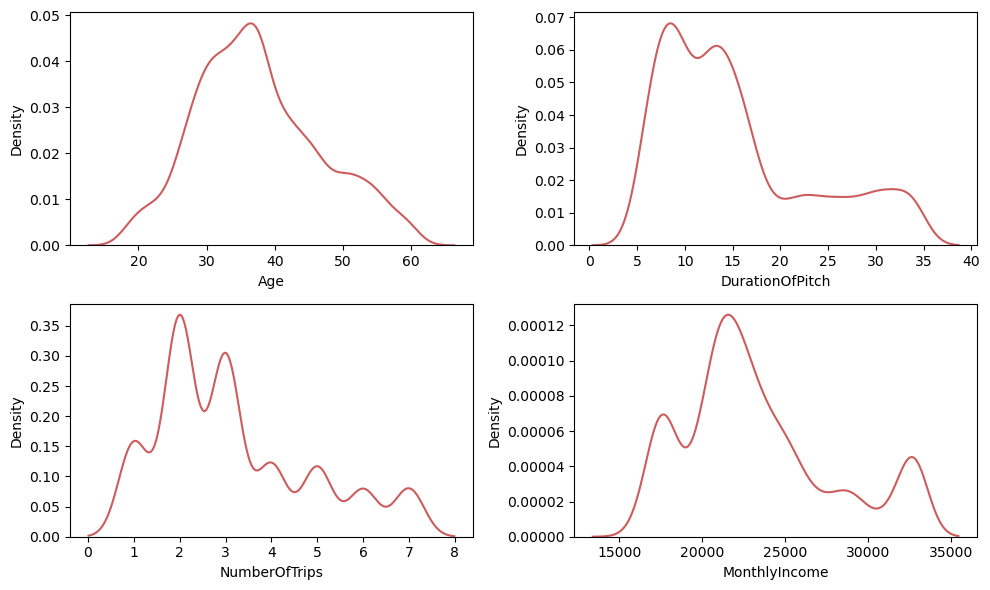

In [283]:
# distribution of data after scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=x_train[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [284]:
#Scaling
#Normalization
norm=MinMaxScaler()
scaler=norm.fit(x_train['Age'].values.reshape(-1,1))
x_train['Age']=scaler.transform(x_train['Age'].values.reshape(-1,1))
x_test['Age']=scaler.transform(x_test['Age'].values.reshape(-1,1))


#Standardization
scal=StandardScaler()
scaler=scal.fit(x_train['DurationOfPitch'].values.reshape(-1,1))
x_train['DurationOfPitch']=scaler.transform(x_train['DurationOfPitch'].values.reshape(-1,1))
x_test['DurationOfPitch']=scaler.transform(x_test['DurationOfPitch'].values.reshape(-1,1))

scaler1=scal.fit(x_train['MonthlyIncome'].values.reshape(-1,1))
x_train['MonthlyIncome']=scaler1.transform(x_train['MonthlyIncome'].values.reshape(-1,1))
x_test['MonthlyIncome']=scaler1.transform(x_test['MonthlyIncome'].values.reshape(-1,1))


In [285]:
x_train[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']].describe()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,3664.000000,3.664000e+03,3664.000000,3.664000e+03
mean,0.455633,-6.593464e-17,3.188046,2.472549e-16
std,0.212624,1.000136e+00,1.699467,1.000136e+00
min,0.000000,-1.295243e+00,1.000000,-1.617439e+00
25%,0.302326,-7.952672e-01,2.000000,-6.266501e-01
50%,0.441860,-2.952914e-01,3.000000,-2.103988e-01
75%,0.581395,4.546723e-01,4.000000,4.648163e-01
max,1.000000,2.329582e+00,7.000000,2.120775e+00


#### Model Building 

In [288]:
Logisticreg=LogisticRegression()
Logisticreg.fit(X_train,Y_train)


LogisticRegression()

In [289]:
def plot_cnf(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def model_evaluation(model, ind_var, act, model_name="Model"):
    y_pred = model.predict(ind_var)
    
    cls = classification_report(act, y_pred)
    accuracy = accuracy_score(act, y_pred)
    
    plot_cnf(model_name, act, y_pred)
    
    print(f'=== {model_name} Evaluation ===')
    print('Classification Report:\n', cls)
    print('Accuracy:', accuracy)
    
    return accuracy

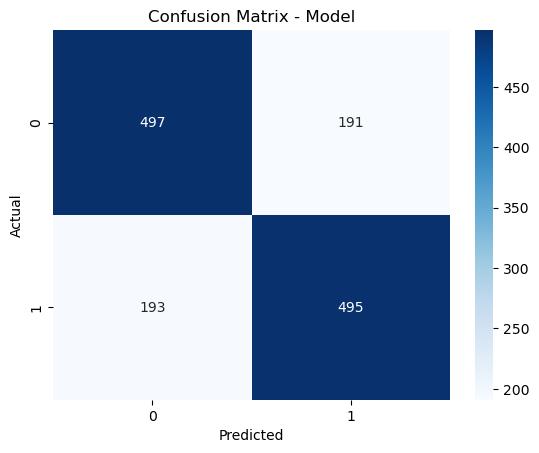

=== Model Evaluation ===
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       688
           1       0.72      0.72      0.72       688

    accuracy                           0.72      1376
   macro avg       0.72      0.72      0.72      1376
weighted avg       0.72      0.72      0.72      1376

Accuracy: 0.7209302325581395


0.7209302325581395

In [290]:
model_evaluation(Logisticreg,X_train,Y_train)

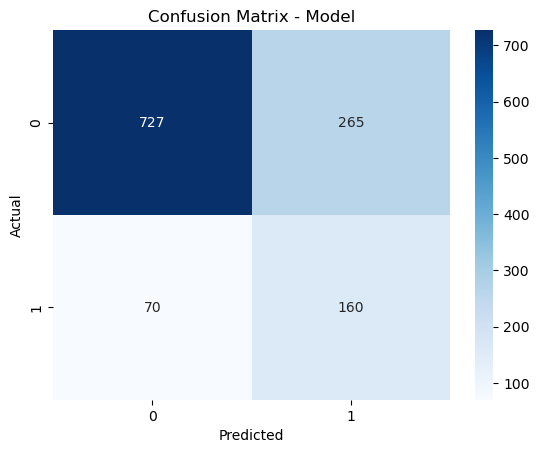

=== Model Evaluation ===
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       992
           1       0.38      0.70      0.49       230

    accuracy                           0.73      1222
   macro avg       0.64      0.71      0.65      1222
weighted avg       0.81      0.73      0.75      1222

Accuracy: 0.7258592471358429


0.7258592471358429

In [291]:
model_evaluation(Logisticreg,x_test,y_test)

# 2.Decision Tree

Train evaluation


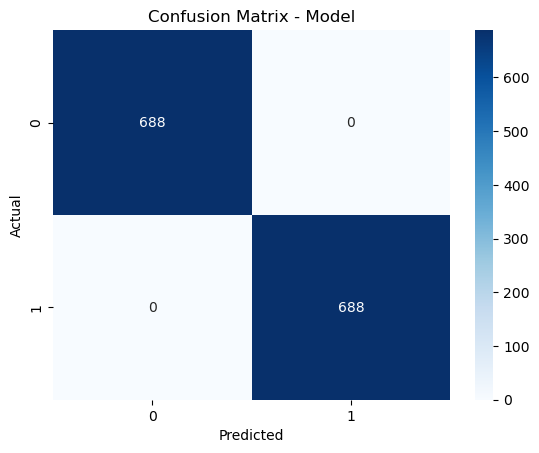

=== Model Evaluation ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       688
           1       1.00      1.00      1.00       688

    accuracy                           1.00      1376
   macro avg       1.00      1.00      1.00      1376
weighted avg       1.00      1.00      1.00      1376

Accuracy: 1.0
Test evaluation


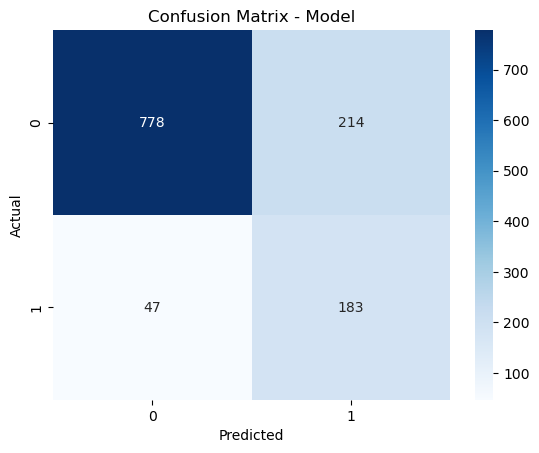

=== Model Evaluation ===
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.86       992
           1       0.46      0.80      0.58       230

    accuracy                           0.79      1222
   macro avg       0.70      0.79      0.72      1222
weighted avg       0.85      0.79      0.81      1222

Accuracy: 0.7864157119476268


0.7864157119476268

In [292]:
dec_tree=DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train,Y_train)
print('Train evaluation')
model_evaluation(dec_tree,X_train,Y_train)
print('Test evaluation')
model_evaluation(dec_tree,x_test,y_test)

Train evaluation


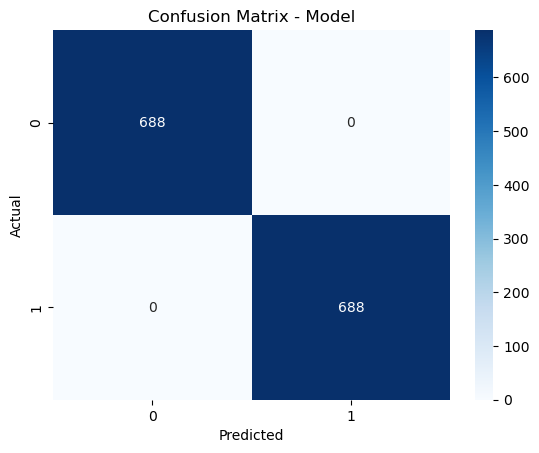

=== Model Evaluation ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       688
           1       1.00      1.00      1.00       688

    accuracy                           1.00      1376
   macro avg       1.00      1.00      1.00      1376
weighted avg       1.00      1.00      1.00      1376

Accuracy: 1.0
Test evaluation


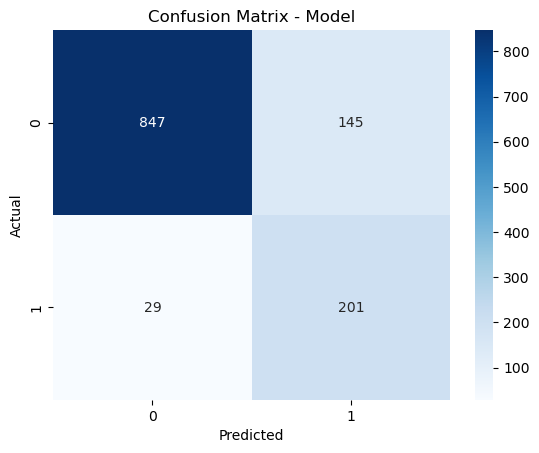

=== Model Evaluation ===
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       992
           1       0.58      0.87      0.70       230

    accuracy                           0.86      1222
   macro avg       0.77      0.86      0.80      1222
weighted avg       0.89      0.86      0.87      1222

Accuracy: 0.8576104746317512


0.8576104746317512

In [293]:
rfr=RandomForestClassifier(random_state=42)
rfr.fit(X_train,Y_train)
print('Train evaluation')
model_evaluation(rfr,X_train,Y_train)
print('Test evaluation')
model_evaluation(rfr,x_test,y_test)

c:\Users\shrad\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train evaluation
Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       688
           1       0.76      0.75      0.76       688

    accuracy                           0.76      1376
   macro avg       0.76      0.76      0.76      1376
weighted avg       0.76      0.76      0.76      1376

Accuracy  0.7594476744186046
Test evaluation
Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       992
           1       0.37      0.71      0.49       230

    accuracy                           0.72      1222
   macro avg       0.64      0.72      0.65      1222
weighted avg       0.81      0.72      0.75      1222

Accuracy  0.720949263502455


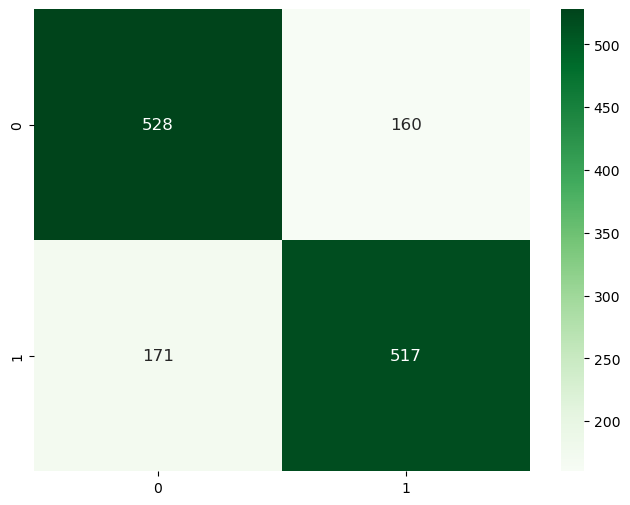

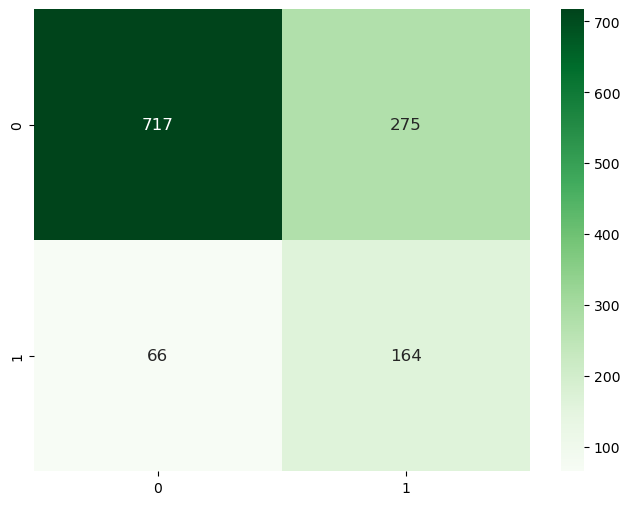

In [102]:
Ada=AdaBoostClassifier(random_state=42)
Ada.fit(X_train,Y_train)
print('Train evaluation')
model_evaluation(Ada,X_train,Y_train)
print('Test evaluation')
model_evaluation(Ada,x_test,y_test)

In [ ]:
# Parameter grid (smaller, focused range to avoid huge runtime)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

# Grid search
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)

print("Best RF Parameters:", rf_grid.best_params_)
print("Best CV Accuracy:", rf_grid.best_score_)
print("Test Accuracy:", rf_grid.best_estimator_.score(X_test, y_test))

In [98]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    }, 
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], 
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])
        
def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

c:\Users\shrad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shrad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shrad\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shrad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver 

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       992
           1       0.37      0.71      0.49       230

    accuracy                           0.72      1222
   macro avg       0.64      0.72      0.65      1222
weighted avg       0.81      0.72      0.75      1222

Accuracy  0.7184942716857611


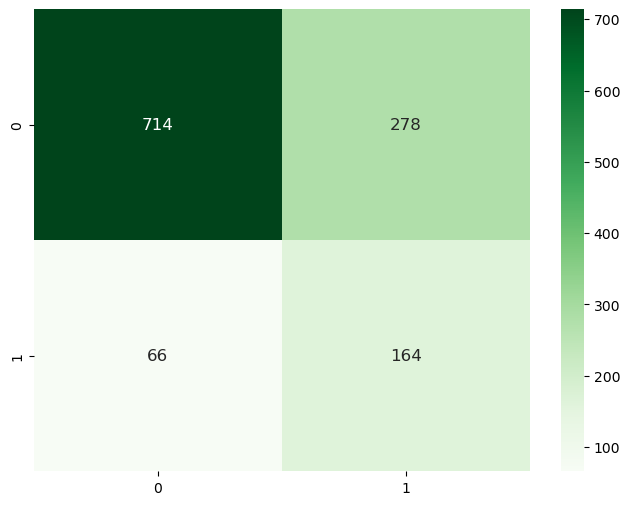

In [99]:
model_lr = LogisticRegression(random_state=42)
tuned_lr = GridSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='accuracy')
tuned_lr.fit(X_train, Y_train)

model_evaluation(tuned_lr, x_test, y_test)

In [ ]:
# Full pipeline cell: Preprocessing + Feature Engineering + SMOTE + Training + GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# --- imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline

RANDOM_STATE = 42

# --- load data ---
df = pd.read_csv('travel (2).csv')

# --------------------------
# === Preprocessing (keeps your EDA style, made robust) ===
# --------------------------
# Fix some inconsistent labels you had
df['Gender'] = df['Gender'].replace({'Fe Male': 'Female'})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Unmarried': 'Single'})

# Fill missing values (same logic you used, but safer)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['TypeofContact'] = df['TypeofContact'].fillna('Unknown')
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode().iloc[0])
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(0)
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(0)
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())

# Remove tiny-frequency occupation "Free Lancer" if present (like you did)
if 'Free Lancer' in df['Occupation'].unique():
    df = df[df['Occupation'] != 'Free Lancer']

# Map categories to numeric (keeping your mapping style)
df['TypeofContact'] = df['TypeofContact'].replace({'Self Enquiry': 0, 'Company Invited': 1, 'Unknown': 2})
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Designation'] = df['Designation'].replace({'Manager':0,'Senior Manager':1,'Executive':2,'AVP':3,'VP':4})
df['ProductPitched'] = df['ProductPitched'].replace({'Basic':0,'Deluxe':1,'Standard':2,'Super Deluxe':3,'King':4})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single':0,'Married':1,'Divorced':2})
df['Occupation'] = df['Occupation'].replace({'Small Business':0,'Salaried':1,'Large Business':2})

# Drop ID and keep consistent columns
if 'CustomerID' in df.columns:
    df.drop(['CustomerID'], axis=1, inplace=True)

# Feature created in your EDA
df['Total_Visiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

# IQR capping (same method you used)
for col in ['NumberOfTrips', 'DurationOfPitch', 'MonthlyIncome']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

# You had dropped Gender previously; keep to match your notebook style (optional)
if 'Gender' in df.columns:
    df.drop('Gender', axis=1, inplace=True)

# --------------------------
# === Feature Engineering (to help push accuracy) ===
# --------------------------
# 1) Income per trip (avoid div by zero)
df['Income_per_Trip'] = df['MonthlyIncome'] / (df['NumberOfTrips'].replace(0, 1))
# 2) Income per person visiting
df['Income_per_Person'] = df['MonthlyIncome'] / (df['Total_Visiting'].replace(0, 1))
# 3) Pitch efficiency: income per second/minute pitched might be meaningful
df['Income_per_PitchDuration'] = df['MonthlyIncome'] / (df['DurationOfPitch'].replace(0, 1))
# 4) Interaction: CityTier * PreferredPropertyStar
df['Tier_Star_interaction'] = df['CityTier'] * df['PreferredPropertyStar']
# 5) Age bins (create small ordinal bucket)
df['Age_bin'] = pd.cut(df['Age'], bins=[15,25,35,45,60,100], labels=[0,1,2,3,4]).astype(int)

# Drop any accidental infinite or NaN from feature engineering
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# --------------------------
# === Prepare X, y and split ===
# --------------------------
X = df.drop(columns=['ProdTaken'])
y = df['ProdTaken']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=RANDOM_STATE, stratify=y)

# --------------------------
# === Scaling (you used MinMax for Age and StandardScaler for others) ===
# --------------------------
minmax = MinMaxScaler()
x_train['Age'] = minmax.fit_transform(x_train[['Age']])
x_test['Age'] = minmax.transform(x_test[['Age']])

std_d = StandardScaler()
x_train['DurationOfPitch'] = std_d.fit_transform(x_train[['DurationOfPitch']])
x_test['DurationOfPitch'] = std_d.transform(x_test[['DurationOfPitch']])

std_m = StandardScaler()
x_train['MonthlyIncome'] = std_m.fit_transform(x_train[['MonthlyIncome']])
x_test['MonthlyIncome'] = std_m.transform(x_test[['MonthlyIncome']])

# Also scale engineered numeric features to keep scale consistent
numeric_engineered = ['Income_per_Trip', 'Income_per_Person', 'Income_per_PitchDuration', 'Tier_Star_interaction']
scaler_eng = StandardScaler()
x_train[numeric_engineered] = scaler_eng.fit_transform(x_train[numeric_engineered])
x_test[numeric_engineered] = scaler_eng.transform(x_test[numeric_engineered])

# --------------------------
# === Balance the training set with SMOTE (keeps majority data) ===
# --------------------------
print("Before SMOTE class distribution:", y_train.value_counts().to_dict())
smote = SMOTE(random_state=RANDOM_STATE)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)
print("After SMOTE class distribution:", pd.Series(y_train_res).value_counts().to_dict())

# --------------------------
# === Evaluation utilities (fixed and reusable) ===
# --------------------------
def plot_cnf(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def model_evaluation(model, ind_var, act, model_name="Model"):
    y_pred = model.predict(ind_var)
    # AUC if probabilities available
    try:
        y_proba = model.predict_proba(ind_var)[:,1]
        auc_test = roc_auc_score(act, y_proba)
    except Exception:
        auc_test = None
    cls = classification_report(act, y_pred, zero_division=0)
    accuracy = accuracy_score(act, y_pred)
    print(f"=== {model_name} ===")
    print("Accuracy:", round(accuracy, 4))
    if auc_test is not None:
        print("ROC AUC:", round(auc_test, 4))
    print("\nClassification Report:\n", cls)
    plot_cnf(model_name, act, y_pred)
    return accuracy

# --------------------------
# === Baseline models (train on SMOTE data) ===

Before SMOTE class distribution: {0: 3174, 1: 734}
After SMOTE class distribution: {0: 3174, 1: 3174}



Training baseline models (this may take a few seconds)...

=== LogisticRegression (baseline) ===
Accuracy: 0.7249
ROC AUC: 0.7582

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81       794
           1       0.37      0.65      0.47       184

    accuracy                           0.72       978
   macro avg       0.63      0.69      0.64       978
weighted avg       0.80      0.72      0.75       978



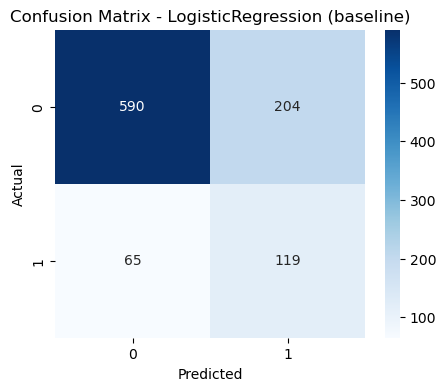

=== DecisionTree (baseline) ===
Accuracy: 0.8691
ROC AUC: 0.8025

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       794
           1       0.64      0.70      0.67       184

    accuracy                           0.87       978
   macro avg       0.78      0.80      0.79       978
weighted avg       0.87      0.87      0.87       978



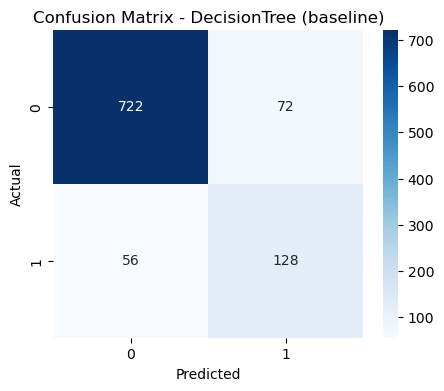

=== RandomForest (baseline) ===
Accuracy: 0.9325
ROC AUC: 0.9454

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       794
           1       0.90      0.72      0.80       184

    accuracy                           0.93       978
   macro avg       0.92      0.85      0.88       978
weighted avg       0.93      0.93      0.93       978



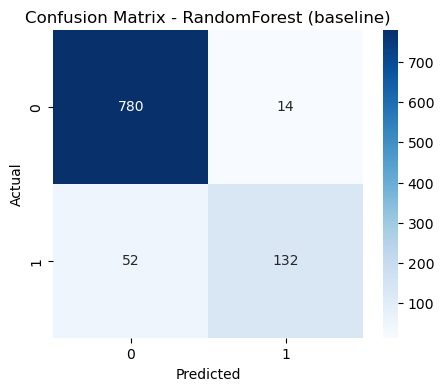

=== AdaBoost (baseline) ===
Accuracy: 0.7638
ROC AUC: 0.7496

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       794
           1       0.40      0.54      0.46       184

    accuracy                           0.76       978
   macro avg       0.64      0.68      0.66       978
weighted avg       0.79      0.76      0.78       978



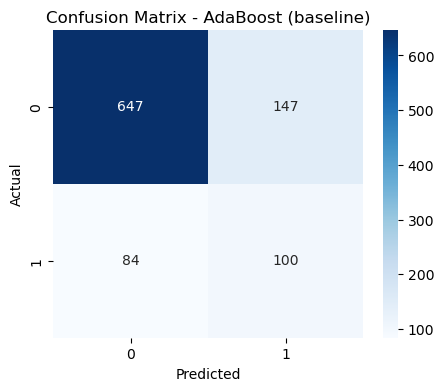

=== GradientBoosting (baseline) ===
Accuracy: 0.8344
ROC AUC: 0.822

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       794
           1       0.56      0.53      0.54       184

    accuracy                           0.83       978
   macro avg       0.73      0.72      0.72       978
weighted avg       0.83      0.83      0.83       978



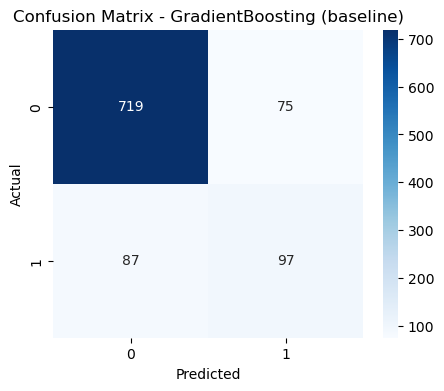

In [220]:
baseline_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'DecisionTree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'RandomForest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost': AdaBoostClassifier(random_state=RANDOM_STATE),
    'GradientBoosting': GradientBoostingClassifier(random_state=RANDOM_STATE)
}

baseline_results = {}
print("\nTraining baseline models (this may take a few seconds)...\n")
for name, mdl in baseline_models.items():
    mdl.fit(X_train_res, y_train_res)
    acc = model_evaluation(mdl, x_test, y_test, model_name=f"{name} (baseline)")
    baseline_results[name] = acc


In [ ]:
baseline_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'DecisionTree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'RandomForest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost': AdaBoostClassifier(random_state=RANDOM_STATE),
    'GradientBoosting': GradientBoostingClassifier(random_state=RANDOM_STATE)
}

baseline_results = {}
print("\nTraining baseline models (this may take a few seconds)...\n")
for name, mdl in baseline_models.items():
    mdl.fit(X_train_res, y_train_res)
    acc = model_evaluation(mdl, x_test, y_test, model_name=f"{name} (baseline)")
    baseline_results[name] = acc

# --------------------------
# === GridSearchCV tuning ===
# We expand RF grid moderately and tune AdaBoost (with base estimator depth)
# We also include small grids for DecisionTree & GradientBoosting & Logistic for completeness.
# --------------------------
print("\nRunning GridSearchCV for selected models (may take minutes)...\n")

# RandomForest Grid (expanded but practical)
# rf_param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True]
# }
rf_param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 15, 20],
    'max_features': ['sqrt', 0.8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE),param_grid=rf_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)




Running GridSearchCV for selected models (may take minutes)...



In [231]:
rf_grid.fit(X_train_res, y_train_res)
rf_best = rf_grid.best_estimator_
print("RF best params:", rf_grid.best_params_)
print("RF best CV score:", rf_grid.best_score_)


# Best model after tuning
best_rf = rf_grid.best_estimator_

# Predictions on test set
y_pred = best_rf.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
RF best params: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RF best CV score: 0.9562088072324292
Test Accuracy: 0.9355828220858896
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       794
           1       0.91      0.73      0.81       184

    accuracy                           0.94       978
   macro avg       0.93      0.86      0.89       978
weighted avg       0.93      0.94      0.93       978

Confusion Matrix:
 [[781  13]
 [ 50 134]]


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Ada best params: {'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.5, 'n_estimators': 200}
Ada best CV score: 0.9039254667634632

Evaluation of tuned models on test set:

=== RandomForest (tuned) ===
Accuracy: 0.9366
ROC AUC: 0.9485

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       794
           1       0.91      0.73      0.81       184

    accuracy                           0.94       978
   macro avg       0.93      0.86      0.89       978
weighted avg       0.94      0.94      0.93       978



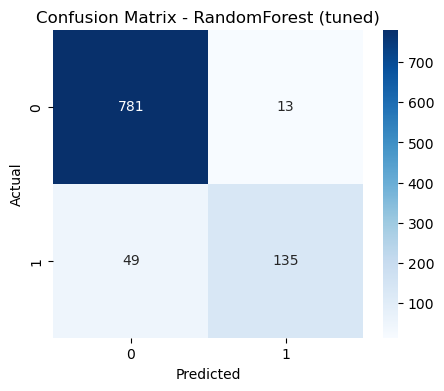

=== AdaBoost (tuned) ===
Accuracy: 0.8865
ROC AUC: 0.8724

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       794
           1       0.73      0.64      0.68       184

    accuracy                           0.89       978
   macro avg       0.82      0.79      0.80       978
weighted avg       0.88      0.89      0.88       978



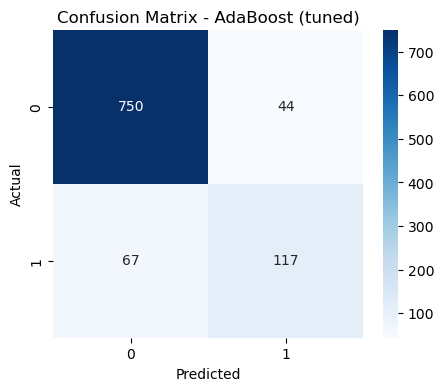

=== DecisionTree (tuned) ===
Accuracy: 0.8691
ROC AUC: 0.8025

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       794
           1       0.64      0.70      0.67       184

    accuracy                           0.87       978
   macro avg       0.78      0.80      0.79       978
weighted avg       0.87      0.87      0.87       978



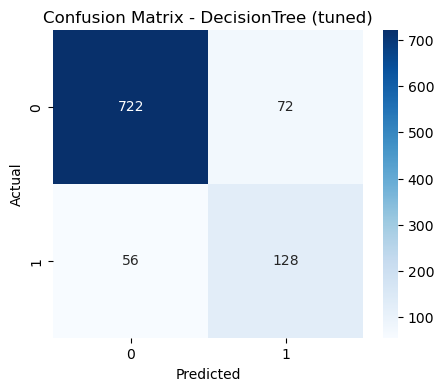

=== LogisticRegression (tuned) ===
Accuracy: 0.728
ROC AUC: 0.7579

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.82       794
           1       0.37      0.66      0.48       184

    accuracy                           0.73       978
   macro avg       0.64      0.70      0.65       978
weighted avg       0.80      0.73      0.75       978



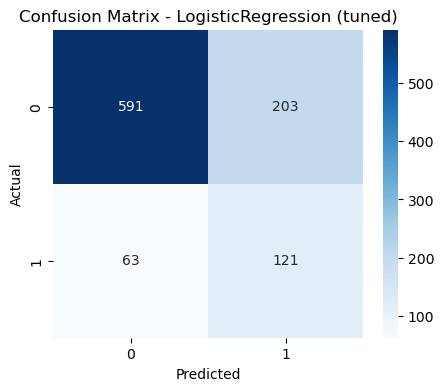


=== Final comparison (test set) ===


,Model,Test Accuracy
0,RandomForest_Tuned,0.9366
1,AdaBoost_Tuned,0.8865
2,DecisionTree_Tuned,0.8691
3,LogisticRegression_Tuned,0.7280



Top feature importances (Random Forest):


Age                         0.088114
Income_per_PitchDuration    0.076738
MaritalStatus               0.074269
Income_per_Trip             0.072227
NumberOfFollowups           0.070968
DurationOfPitch             0.069380
MonthlyIncome               0.066258
Tier_Star_interaction       0.054360
Income_per_Person           0.052050
ProductPitched              0.049357
Age_bin                     0.046564
NumberOfTrips               0.041418
Passport                    0.038615
PitchSatisfactionScore      0.037882
Total_Visiting              0.033650
PreferredPropertyStar       0.030050
Designation                 0.028151
Occupation                  0.023253
CityTier                    0.019975
TypeofContact               0.014472
dtype: float64

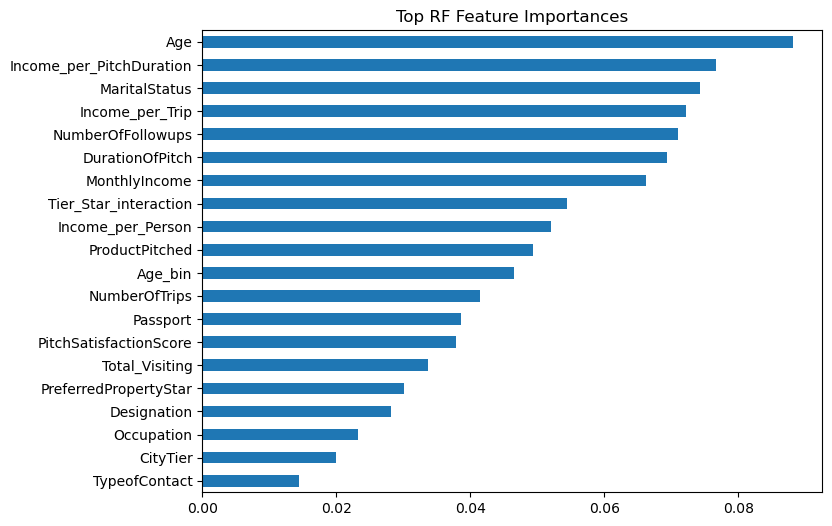

In [227]:

# AdaBoost Grid (tune base estimator depth via base_estimator param objects)
ada_param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1),
                       DecisionTreeClassifier(max_depth=2),
                       DecisionTreeClassifier(max_depth=3)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME.R']
}
ada_grid = GridSearchCV(AdaBoostClassifier(random_state=RANDOM_STATE),param_grid=ada_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
ada_grid.fit(X_train_res, y_train_res)
ada_best = ada_grid.best_estimator_
print("Ada best params:", ada_grid.best_params_)
print("Ada best CV score:", ada_grid.best_score_)

# Small grid for Decision Tree (optional)
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE),
                       param_grid=dt_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=0)
dt_grid.fit(X_train_res, y_train_res)
dt_best = dt_grid.best_estimator_

# Optional small grid for Logistic Regression (regularization)
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
                       param_grid=lr_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=0)
lr_grid.fit(X_train_res, y_train_res)
lr_best = lr_grid.best_estimator_

# --------------------------
# === Evaluate tuned models on test set ===
# --------------------------
print("\nEvaluation of tuned models on test set:\n")
rf_test_acc = model_evaluation(rf_best, x_test, y_test, model_name="RandomForest (tuned)")
ada_test_acc = model_evaluation(ada_best, x_test, y_test, model_name="AdaBoost (tuned)")
dt_test_acc = model_evaluation(dt_best, x_test, y_test, model_name="DecisionTree (tuned)")
lr_test_acc = model_evaluation(lr_best, x_test, y_test, model_name="LogisticRegression (tuned)")

# --------------------------
# === Final comparison table ===
# --------------------------
final_models = {
    'LogisticRegression_Tuned': lr_best,
    'DecisionTree_Tuned': dt_best,
    'RandomForest_Tuned': rf_best,
    'AdaBoost_Tuned': ada_best
}

comparison = []
for name, mdl in final_models.items():
    acc = accuracy_score(y_test, mdl.predict(x_test))
    comparison.append({'Model': name, 'Test Accuracy': round(acc, 4)})

comp_df = pd.DataFrame(comparison).sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)
print("\n=== Final comparison (test set) ===")
display(comp_df)

# Save best model (optional)
# import joblib
# joblib.dump(rf_best, 'rf_best_smote.joblib')
# joblib.dump(ada_best, 'ada_best_smote.joblib')

# If you want, display feature importances for the final RF
try:
    fi = pd.Series(rf_best.feature_importances_, index=x_train.columns).sort_values(ascending=False).head(20)
    print("\nTop feature importances (Random Forest):")
    display(fi)
    fi.plot(kind='barh', figsize=(8,6)); plt.gca().invert_yaxis(); plt.title('Top RF Feature Importances')
except Exception as e:
    print("Could not compute feature importances:", e)